# **Project I**

###### - Team Members: Karen Lin, Kevin Zhang, Sunjae Youm </br> - 6/17/2024 </br> - Data Source: https://catalog.data.gov/dataset/crash-reporting-drivers-data/resource/9851a37f-4f32-464e-8ba6-c23023653a7f

### **Abstract**
Our data team assumed that we received a data request from the Montgomery County local government in Maryland. The purpose of the request was to determine how to use the county budget to reduce car accidents. Additionally, Montgomery County wanted to choose a specific municipality and asked us, as data analysts, to identify which roads need immediate improvements. To achieve this, we investigated traffic accident records from January 2015 to March 2024, analyzing the main car crash accident factors and variables from the dataset.

In [1]:
# Dependencies

import pandas as pd
import numpy as np
import requests
import json
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the car_crash_drivers_report
car_crash_df = pd.read_csv("./Resources/Crash_Reporting_-_Drivers_Data.csv")
car_crash_df.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP3040003N,190026050,Montgomery County Police,Property Damage Crash,05/31/2019 03:00:00 PM,NaN,NaN,NaN,NaN,PARKING LOT OF 3215 SPARTAN RD,...,15,No,No,2004,HONDA,TK,UNKNOWN,39.150044,-77.063089,"(39.15004368, -77.06308884)"
1,EJ78850038,230034791,Gaithersburg Police Depar,Property Damage Crash,07/21/2023 05:59:00 PM,Maryland (State),FREDERICK RD,Unknown,WATKINS MILL RD,NaN,...,40,No,No,2011,GMC,TK,NO MISUSE,39.159264,-77.219025,"(39.1592635, -77.21902483)"
2,MCP2009002G,230034583,Montgomery County Police,Property Damage Crash,07/20/2023 03:10:00 PM,Maryland (State),GEORGIA AVE,Maryland (State),NORBECK RD,NaN,...,35,No,No,2019,FORD,F150,NO MISUSE,39.109535,-77.075806,"(39.10953506, -77.07580619)"
3,MCP3201004C,230035036,Montgomery County Police,Property Damage Crash,07/23/2023 12:10:00 PM,County,CRYSTAL ROCK DR,County,WATERS LANDING DR,NaN,...,40,No,No,2016,KIA,SW,NO MISUSE,39.190149,-77.266766,"(39.19014917, -77.26676583)"
4,MCP23290028,230035152,Montgomery County Police,Property Damage Crash,07/24/2023 06:10:00 AM,County,MONTGOMERY VILLAGE AVE,County,CENTERWAY RD,NaN,...,35,No,No,2016,TOYT,TK,NO MISUSE,39.172558,-77.203745,"(39.17255801, -77.20374546)"


In [3]:
# show what columns the dataframe has
car_crash_df.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [4]:
# checking the number of columns in raw dataset
len(car_crash_df.columns)

43

In [5]:
# checking the data types of the dataset
car_crash_df.dtypes

Report Number                      object
Local Case Number                  object
Agency Name                        object
ACRS Report Type                   object
Crash Date/Time                    object
Route Type                         object
Road Name                          object
Cross-Street Type                  object
Cross-Street Name                  object
Off-Road Description               object
Municipality                       object
Related Non-Motorist               object
Collision Type                     object
Weather                            object
Surface Condition                  object
Light                              object
Traffic Control                    object
Driver Substance Abuse             object
Non-Motorist Substance Abuse       object
Person ID                          object
Driver At Fault                    object
Injury Severity                    object
Circumstance                       object
Driver Distracted By              

In [6]:
# Check the total number of Municipality records
car_crash_df["Report Number"].count()

172105

In [7]:
# Remove rows where Municipality is "N/A"
car_crash_df = car_crash_df[car_crash_df["Municipality"] != "N/A"]

# Remove rows where Municipality is NaN
car_crash_df = car_crash_df.dropna(subset=["Municipality"])

# Check data cleaning process has been properly applied
car_crash_df["Report Number"].count()

19126

In [8]:
# define the columns/variables for the analysis
selected_columns = ["Report Number", "Crash Date/Time", "Route Type", "Road Name","Cross-Street Name","Collision Type", "Municipality","Weather","Surface Condition", "Traffic Control","Speed Limit","Latitude","Longitude"]

In [9]:
# recreate the dataframe after removing not available data
reduced_car_crash_df = car_crash_df[selected_columns]
reduced_car_crash_df[['Date', 'Time']] = reduced_car_crash_df['Crash Date/Time'].str.split(' ', expand=True, n=1)

# Convert the time to military format
reduced_car_crash_df['Time'] = pd.to_datetime(reduced_car_crash_df['Time'], format='%I:%M:%S %p').dt.strftime('%H:%M:%S')

# Drop the original "Crash Date/Time" and "Time" columns if needed
reduced_car_crash_df.drop(columns=['Crash Date/Time'], inplace=True)

# Create the new columns to further data perspective
reduced_car_crash_df['Date'] = pd.to_datetime(reduced_car_crash_df['Date'], format='%m/%d/%Y')
reduced_car_crash_df['Year'] = reduced_car_crash_df['Date'].dt.year
reduced_car_crash_df['Month'] = reduced_car_crash_df['Date'].dt.month
reduced_car_crash_df['Day'] = reduced_car_crash_df['Date'].dt.day
reduced_car_crash_df.head()

,Report Number,Route Type,Road Name,Cross-Street Name,Collision Type,Municipality,Weather,Surface Condition,Traffic Control,Speed Limit,Latitude,Longitude,Date,Time,Year,Month,Day
41,EJ78850036,Municipality,FIRSTFIELD RD,QUINCE ORCHARD BLVD,STRAIGHT MOVEMENT ANGLE,GAITHERSBURG,CLEAR,DRY,STOP SIGN,30,39.141990,-77.224371,2023-07-20,14:48:00,2023,7,20
50,MCP3161005H,Maryland (State),BRADLEY LA,WEST AVE,SAME DIR REAR END,CHEVY CHASE #4,CLEAR,DRY,NO CONTROLS,25,38.977186,-77.088324,2023-07-27,16:14:00,2023,7,27
51,DM8476004Z,Maryland (State),NEW HAMPSHIRE AVE,HOLTON LA,SAME DIRECTION RIGHT TURN,TAKOMA PARK,CLEAR,DRY,NaN,35,38.985947,-76.988159,2023-07-22,17:10:00,2023,7,22
52,EJ78940034,Municipality,W DEER PARK RD,CEDAR AVE,SAME DIR REAR END,GAITHERSBURG,CLEAR,DRY,NO CONTROLS,25,39.133463,-77.203386,2023-07-15,10:47:00,2023,7,15
62,DD56700006,Maryland (State),ROCKVILLE PIKE,W EDMONSTON DR,STRAIGHT MOVEMENT ANGLE,ROCKVILLE,NaN,DRY,TRAFFIC SIGNAL,40,39.074431,-77.135645,2023-07-22,04:07:00,2023,7,22


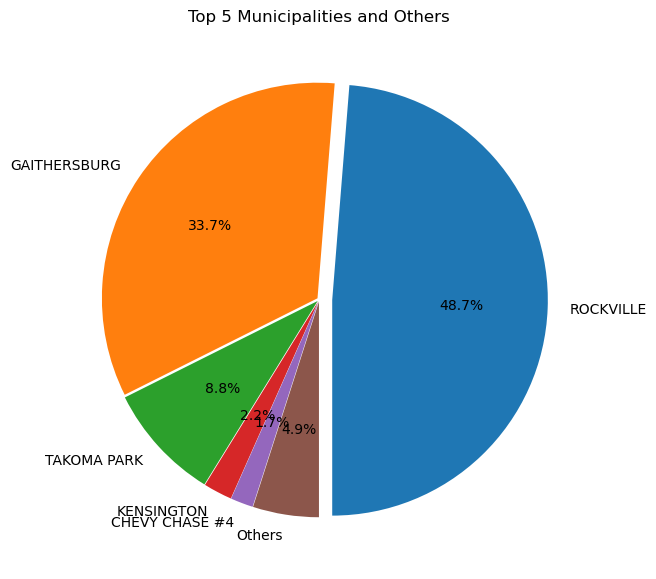

In [10]:
# Plot Pie Chart

grouped_df1 = (
reduced_car_crash_df
.groupby("Municipality")
.size()
.reset_index(name='num_of_accident')
.sort_values(by="num_of_accident", ascending=False)
.reset_index(drop=True)
)

# Calculate the top 5 and the sum of the rest
top_5 = grouped_df1.head(5)
others_count = grouped_df1.iloc[5:]['num_of_accident'].sum()

# Create a DataFrame for "Others"
others = pd.DataFrame({'Municipality': ['Others'], 'num_of_accident': [others_count]})

# Concatenate the top 5 with the "Others" row
top_5 = pd.concat([top_5, others], ignore_index=True)

# Plotting
labels = top_5["Municipality"]
sizes = top_5["num_of_accident"]
explode = [0.06,0.01,0.01,0.01,0.01,0.01] # Explode all slices slightly

plt.figure(figsize=(10, 7))
plt.pie(sizes, autopct="%1.1f%%", labels=labels, explode=explode, startangle=270)
plt.title('Top 5 Municipalities and Others')

plt.show()

In [12]:
# filtering the reduced_car_crash_df by the Municipality that has the most car accident between 2021 and 2024
f1_df1 = reduced_car_crash_df[(reduced_car_crash_df["Municipality"] == "ROCKVILLE") & (reduced_car_crash_df["Year"] > 2020)]
f1_df1

,Report Number,Route Type,Road Name,Cross-Street Name,Collision Type,Municipality,Weather,Surface Condition,Traffic Control,Speed Limit,Latitude,Longitude,Date,Time,Year,Month,Day
62,DD56700006,Maryland (State),ROCKVILLE PIKE,W EDMONSTON DR,STRAIGHT MOVEMENT ANGLE,ROCKVILLE,NaN,DRY,TRAFFIC SIGNAL,40,39.074431,-77.135645,2023-07-22,04:07:00,2023,7,22
63,MCP25520068,Maryland (State),FREDERICK RD,RIDGEMONT AVE,HEAD ON LEFT TURN,ROCKVILLE,CLEAR,WET,TRAFFIC SIGNAL,35,39.119066,-77.171987,2023-07-25,21:57:00,2023,7,25
66,DD5652003G,Maryland (State),NORBECK RD,AVERY RD,SAME DIR REAR END,ROCKVILLE,CLEAR,DRY,TRAFFIC SIGNAL,50,39.093226,-77.122113,2023-07-21,14:26:00,2023,7,21
88,DD56700006,Maryland (State),ROCKVILLE PIKE,W EDMONSTON DR,STRAIGHT MOVEMENT ANGLE,ROCKVILLE,NaN,DRY,TRAFFIC SIGNAL,30,39.074431,-77.135645,2023-07-22,04:07:00,2023,7,22
91,DD55830085,Maryland (State),HUNGERFORD DR,MANNAKEE ST,SAME DIR REAR END,ROCKVILLE,CLEAR,DRY,TRAFFIC SIGNAL,35,39.096320,-77.153139,2023-07-24,10:52:00,2023,7,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171864,MCP2160002L,Maryland (State),ROCKVILLE PIKE,EDMONSTON DR,SAME DIRECTION SIDESWIPE,ROCKVILLE,CLEAR,DRY,NaN,35,39.071888,-77.132846,2023-03-04,17:54:00,2023,3,4
172063,DD5652000P,Other Public Roadway,GRAND CHAMPION DR,KING FARM BLVD,STRAIGHT MOVEMENT ANGLE,ROCKVILLE,RAINING,WET,NO CONTROLS,25,39.115416,-77.170673,2022-05-27,12:54:00,2022,5,27
172077,DD5617002X,Municipality,PRETTYMAN DR,FALLSGROVE BLVD,HEAD ON,ROCKVILLE,NaN,NaN,STOP SIGN,25,39.093896,-77.194305,2022-08-03,19:25:00,2022,8,3
172087,DD5649000V,Municipality,ROLLINS AVE,MARTHA TERR,SAME DIR REAR END,ROCKVILLE,NaN,DRY,STOP SIGN,25,39.057302,-77.133702,2021-08-19,15:50:00,2021,8,19


In [13]:
# plot the map with Latitude and Longitude to visually display which street has the most accidents
map_plot_1 = f1_df1.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    color = "Municipality",
    width=1000,
    height=800
)
plt.savefig("./Images/Streets_Map_Plot.png")
map_plot_1

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Municipality)

<Figure size 640x480 with 0 Axes>

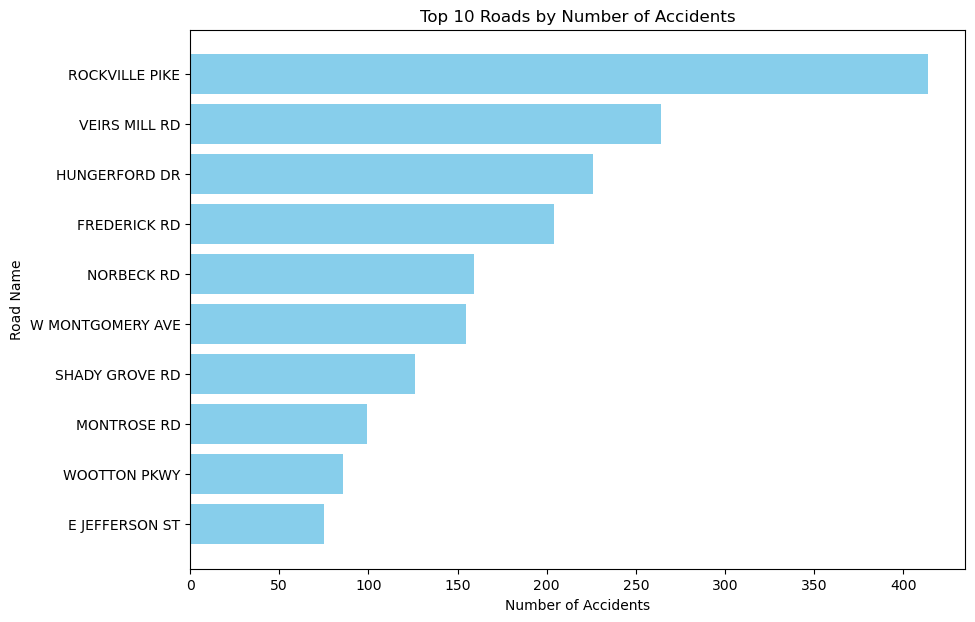

In [14]:
# Group by filtered_df1 by Road Name
f1_grouped_df1 = (
    f1_df1
    .groupby("Road Name")
    .size()
    .reset_index(name='num_of_accident')
    .sort_values(by="num_of_accident", ascending=False)
    .reset_index(drop=True)
)

# Taking the top 10 for plotting
top_10 = f1_grouped_df1.head(10)

# Plotting
plt.figure(figsize=(10, 7))
plt.barh(top_10["Road Name"], top_10["num_of_accident"], color='skyblue')
plt.xlabel('Number of Accidents')
plt.ylabel('Road Name')
plt.title('Top 10 Roads by Number of Accidents')
plt.gca().invert_yaxis()  # To have the highest values on top
plt.savefig("./Images/Top_10_Roads_BarGraph.png")
plt.show()

In [15]:
f2_df = f1_df1[f1_df1["Road Name"] == "ROCKVILLE PIKE"]
f2_df

,Report Number,Route Type,Road Name,Cross-Street Name,Collision Type,Municipality,Weather,Surface Condition,Traffic Control,Speed Limit,Latitude,Longitude,Date,Time,Year,Month,Day
62,DD56700006,Maryland (State),ROCKVILLE PIKE,W EDMONSTON DR,STRAIGHT MOVEMENT ANGLE,ROCKVILLE,NaN,DRY,TRAFFIC SIGNAL,40,39.074431,-77.135645,2023-07-22,04:07:00,2023,7,22
88,DD56700006,Maryland (State),ROCKVILLE PIKE,W EDMONSTON DR,STRAIGHT MOVEMENT ANGLE,ROCKVILLE,NaN,DRY,TRAFFIC SIGNAL,30,39.074431,-77.135645,2023-07-22,04:07:00,2023,7,22
317,DD561500FH,Maryland (State),ROCKVILLE PIKE,RICHARD MONTGOMERY DR,STRAIGHT MOVEMENT ANGLE,ROCKVILLE,CLEAR,DRY,TRAFFIC SIGNAL,25,39.083840,-77.153118,2023-07-25,15:20:00,2023,7,25
318,DD561500FH,Maryland (State),ROCKVILLE PIKE,RICHARD MONTGOMERY DR,STRAIGHT MOVEMENT ANGLE,ROCKVILLE,CLEAR,DRY,TRAFFIC SIGNAL,35,39.083840,-77.153118,2023-07-25,15:20:00,2023,7,25
702,DD559500DS,Maryland (State),ROCKVILLE PIKE,MT VERNON PL,STRAIGHT MOVEMENT ANGLE,ROCKVILLE,CLOUDY,DRY,STOP SIGN,25,39.078854,-77.142090,2023-08-05,12:15:00,2023,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169691,MCP2726005H,Maryland (State),ROCKVILLE PIKE,CONGRESSIONAL LA,OTHER,ROCKVILLE,RAINING,WET,OTHER,40,39.064598,-77.126280,2021-04-14,12:03:00,2021,4,14
169732,DD56510016,Maryland (State),ROCKVILLE PIKE,ROLLINS AVE,SAME DIRECTION SIDESWIPE,ROCKVILLE,NaN,DRY,NaN,35,39.059269,-77.121833,2021-12-14,19:14:00,2021,12,14
170973,MCP2339007K,Maryland (State),ROCKVILLE PIKE,ROLLINS AVE,SAME DIRECTION RIGHT TURN,ROCKVILLE,CLEAR,DRY,TRAFFIC SIGNAL,35,39.058654,-77.121170,2022-10-07,16:15:00,2022,10,7
171135,DD56440025,Maryland (State),ROCKVILLE PIKE,HALPINE RD,STRAIGHT MOVEMENT ANGLE,ROCKVILLE,CLOUDY,DRY,TRAFFIC SIGNAL,35,39.061794,-77.124088,2022-01-05,15:00:00,2022,1,5


In [16]:
# grouped by Speed Limit
f2_grouped_sl_df = (
    f2_df
    .groupby("Speed Limit")
    .size()
    .reset_index(name='num_of_accident')
    .sort_values(by="num_of_accident", ascending=False)
    .reset_index(drop=True)
)
f2_grouped_sl_df

,Speed Limit,num_of_accident
0,35,194
1,40,126
2,30,38
3,45,21
4,25,17
5,0,7
6,5,4
7,10,3
8,20,2
9,15,1


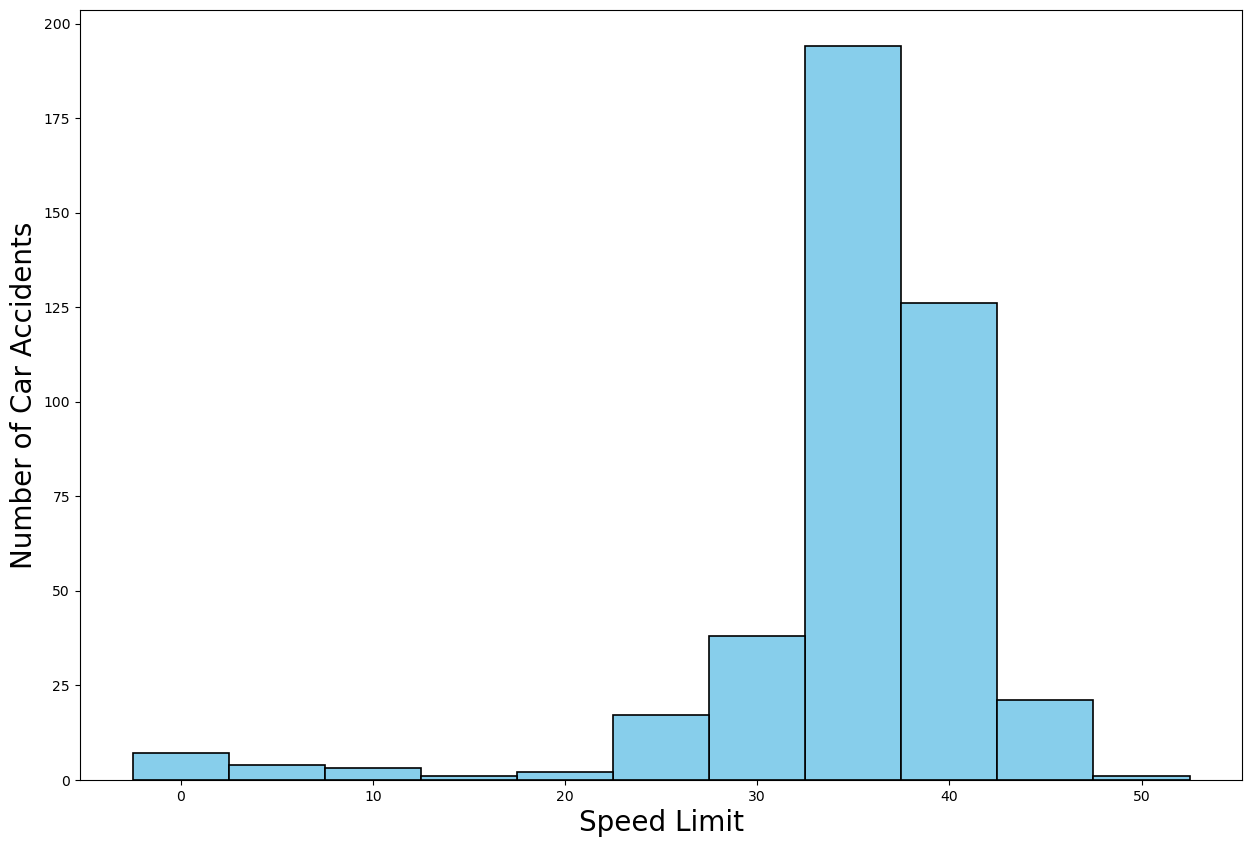

In [17]:
# Bar Graph for Speed Limit
plt.figure(figsize=(15, 10))
plt.bar(f2_grouped_sl_df["Speed Limit"], f2_grouped_sl_df["num_of_accident"], edgecolor='black', linewidth=1.2, width = 5, color="skyblue")
plt.xlabel("Speed Limit", fontsize = 20)
plt.ylabel("Number of Car Accidents", fontsize = 20)
plt.savefig("./Images/By_Speed_Limit_Bar_Graph.png")
plt.show()

In [18]:
# grouped by Traffic Control
f2_grouped_tc_df = (
    f2_df
    .groupby("Traffic Control")
    .size()
    .reset_index(name='num_of_accident')
    .sort_values(by="num_of_accident", ascending=False)
    .reset_index(drop=True)
)
f2_grouped_tc_df

,Traffic Control,num_of_accident
0,TRAFFIC SIGNAL,209
1,NO CONTROLS,110
2,OTHER,15
3,STOP SIGN,15
4,FLASHING TRAFFIC SIGNAL,9
5,YIELD SIGN,2
6,WARNING SIGN,1


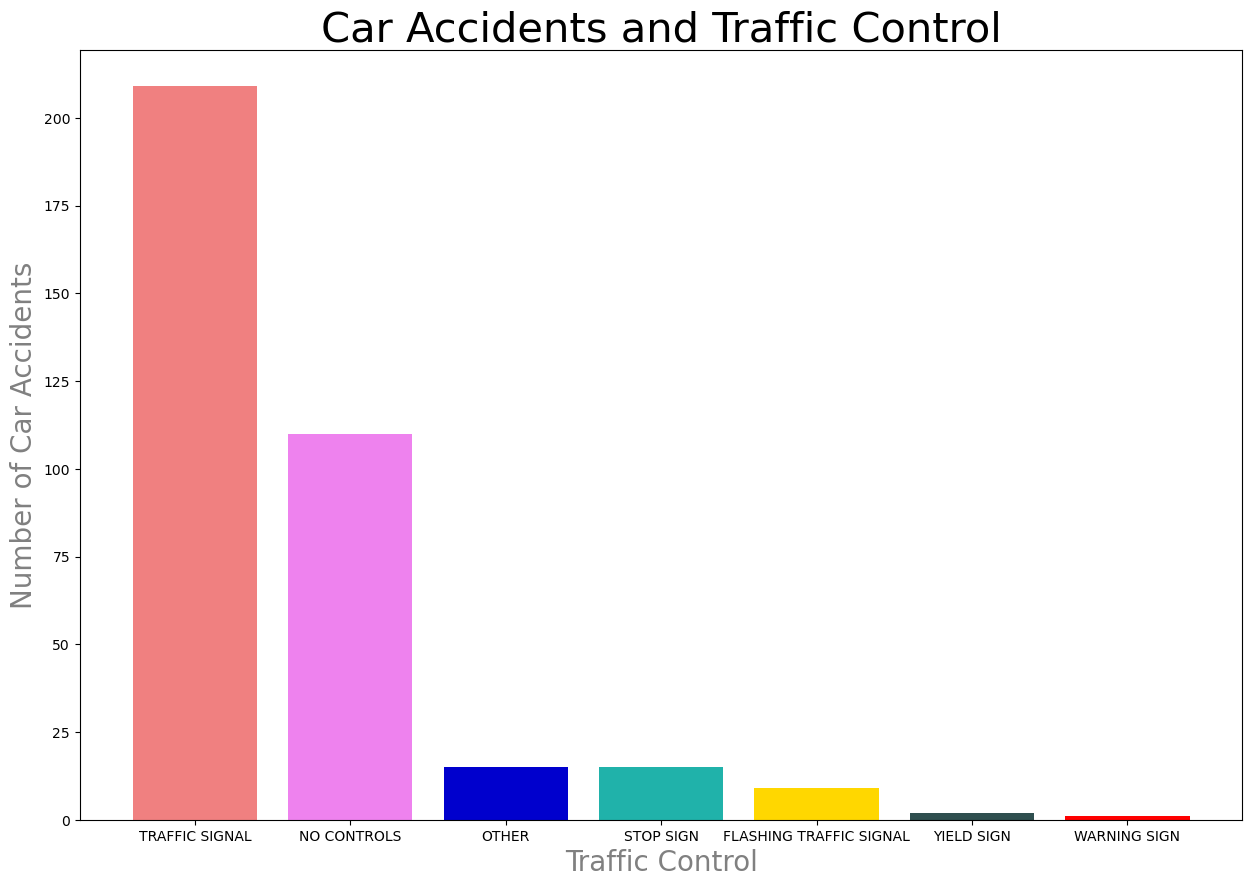

In [19]:
plt.figure(figsize=(15, 10))
colors = ["lightcoral", "violet", "mediumblue", "lightseagreen", "gold", "darkslategrey", "red"]
plt.bar(f2_grouped_tc_df["Traffic Control"],f2_grouped_tc_df["num_of_accident"], color = colors)
plt.xlabel("Traffic Control", fontsize = 20, color = "grey")
plt.ylabel("Number of Car Accidents", fontsize = 20, color = "grey")
plt.title("Car Accidents and Traffic Control", size=30)
plt.savefig("./Images/Traffic_Control_Bar_Graph.png")
plt.show()

In [20]:
# grouped by weather
f2_grouped_w_df = (
    f2_df
    .groupby("Weather")
    .size()
    .reset_index(name='num_of_accident')
    .sort_values(by="num_of_accident", ascending=False)
    .reset_index(drop=True)
)
f2_grouped_w_df

,Weather,num_of_accident
0,CLEAR,283
1,CLOUDY,47
2,RAINING,42
3,FOGGY,2
4,SEVERE WINDS,2
5,SLEET,2
6,SNOW,1


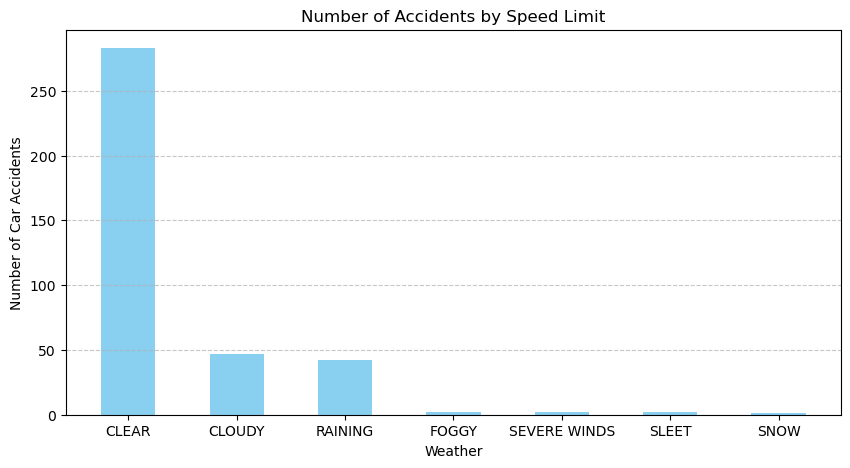

In [21]:
plt.figure(figsize=(10, 5))
plt.bar(f2_grouped_w_df['Weather'], f2_grouped_w_df['num_of_accident'], color='#89CFF0', width = 0.5)
plt.title('Number of Accidents by Speed Limit')
plt.xlabel('Weather')
plt.ylabel('Number of Car Accidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("./Images/By_Weather_Bar_Graph.png")
plt.show()

In [22]:
# grouped by surface Condition Limit
f2_grouped_sc_df = (
    f2_df
    .groupby("Surface Condition")
    .size()
    .reset_index(name='num_of_accident')
    .sort_values(by="num_of_accident", ascending=False)
    .reset_index(drop=True)
)
f2_grouped_sc_df

,Surface Condition,num_of_accident
0,DRY,346
1,WET,47
2,SLUSH,2
3,SNOW,1


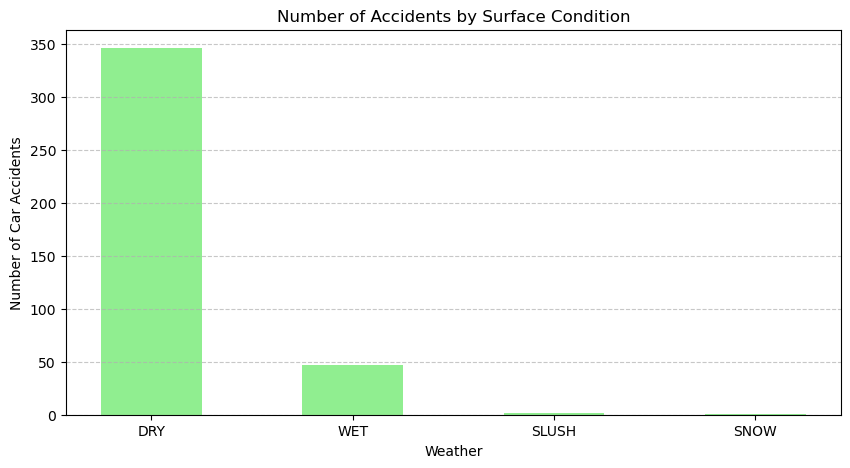

In [23]:
plt.figure(figsize=(10, 5))
plt.bar(f2_grouped_sc_df['Surface Condition'], f2_grouped_sc_df['num_of_accident'], color='#90EE90', width = 0.5)
plt.title('Number of Accidents by Surface Condition')
plt.xlabel('Weather')
plt.ylabel('Number of Car Accidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("./Images/By_surface_condition_Bar_Graph.png")
plt.show()

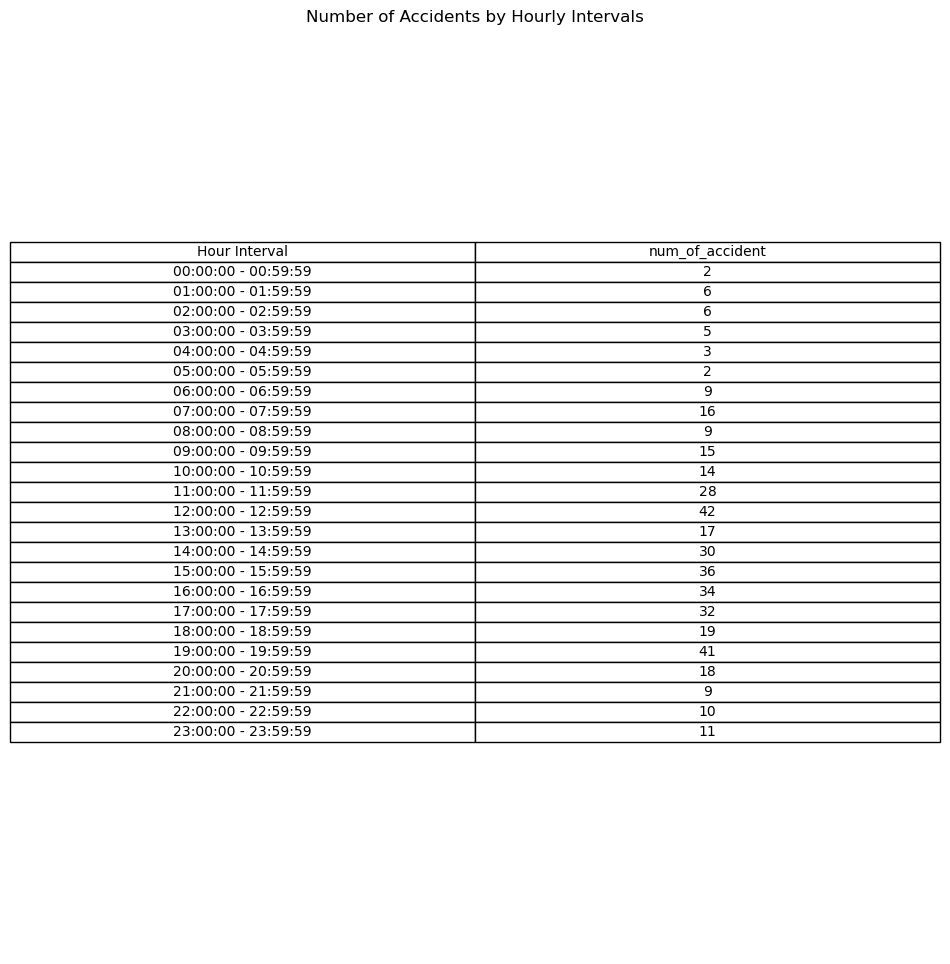

In [36]:
# Ensure the 'Time' column is in datetime format
f2_df['Time'] = pd.to_datetime(f2_df['Time'], format='%H:%M:%S')

# Create a new column for the hourly intervals
f2_df['Hour Interval'] = f2_df['Time'].dt.floor('H').dt.strftime('%H:%M:%S') + ' - ' + (f2_df['Time'].dt.floor('H') + pd.Timedelta(hours=1) - pd.Timedelta(seconds=1)).dt.strftime('%H:%M:%S')

# Group by the hourly intervals and count the number of accidents
f2_grouped_tf_df = (
    f2_df
    .groupby('Hour Interval')
    .size()
    .reset_index(name='num_of_accident')
    .sort_values(by='Hour Interval')
    .reset_index(drop=True)
)

# Display the frequency table using Matplotlib
fig, ax = plt.subplots(figsize=(10, 12))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=f2_grouped_tf_df.values, colLabels=f2_grouped_tf_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title('Number of Accidents by Hourly Intervals')
plt.savefig("./Images/Hour_Interval_Table.png")
plt.show()


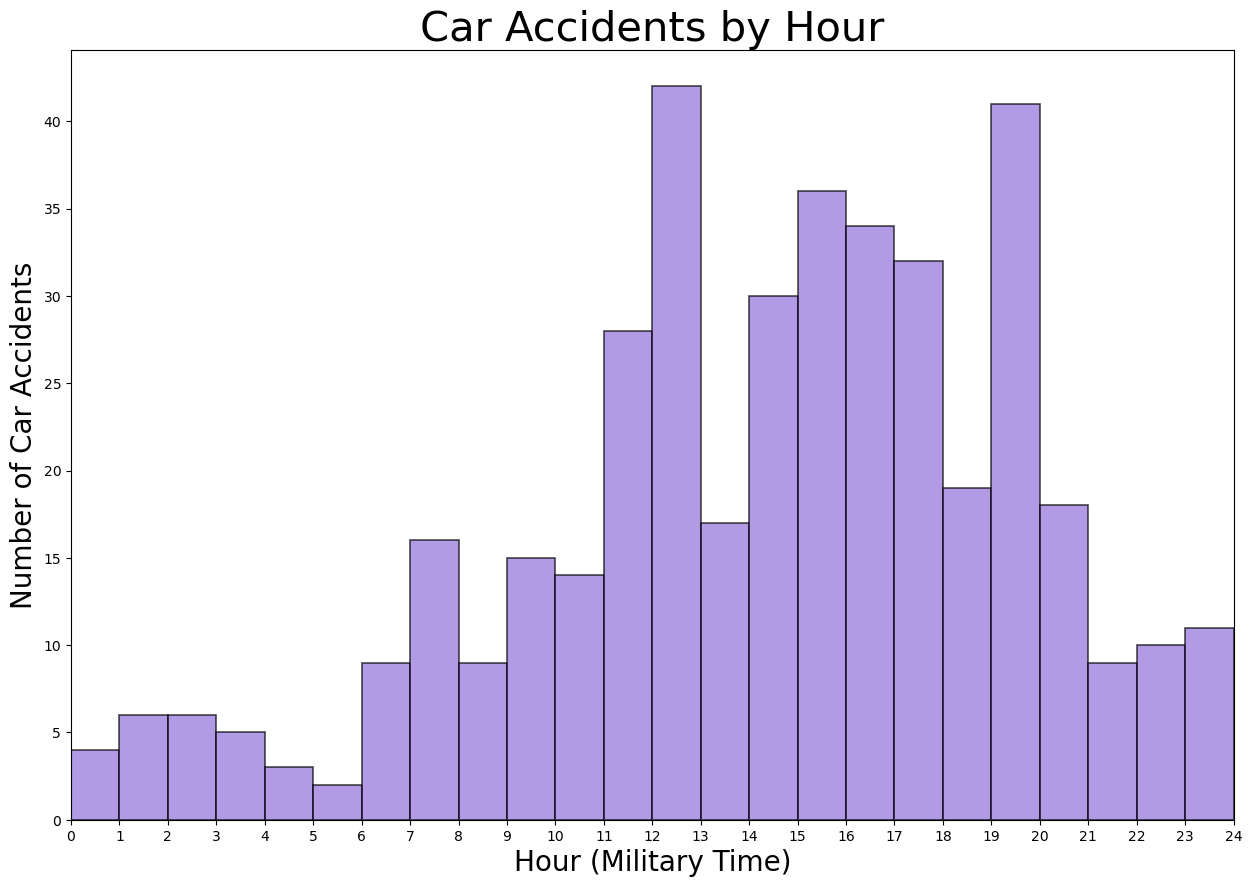

In [26]:
# Visualization of car crashes at different hours

## Make a new array corresponding to the number of times each hour "appears"
hours_in_order = np.repeat(0, f2_grouped_tf_df.iloc[0]["num_of_accident"])
hours = np.arange(24)

## Go through the hours in a day (24), get the number of car crashes that occured during each hour, and put the hour into the hours_in_order list
## (number of times a car crash occured during that hour) number of times. For example, if 5 car crashes occured during an hour 1, insert
## 1 into the list 5 times (1, 1, 1, 1, 1)
for i in range(len(hours)):
    hour_frequencies = np.repeat(i, f2_grouped_tf_df.iloc[i]["num_of_accident"])
    hours_in_order = np.concatenate((hours_in_order, hour_frequencies), axis=0)


## Create the histogram
plt.figure(figsize=(15, 10)) ## Size of the graph
### Code for how to draw the edges of bins more noticeably gotten from: 
### https://stackoverflow.com/questions/42741687/histogram-outlined-by-added-edgecolor
plt.hist(hours_in_order, bins = np.arange(25), edgecolor='black', linewidth=1.2, color = "mediumpurple", alpha=0.7)
### Label for x-axis
plt.xlabel("Hour Interval", fontsize = 20)
### Label for y-axis
plt.ylabel("Number of Car Accidents", fontsize = 20)
plt.xlim(0, 24)
plt.xticks(np.arange(25), np.arange(25))
plt.title("Car Accidents by Hour", size = 30)
plt.savefig("./Images/Car_Accidents_By_Hour_Histogram.png")
plt.show()


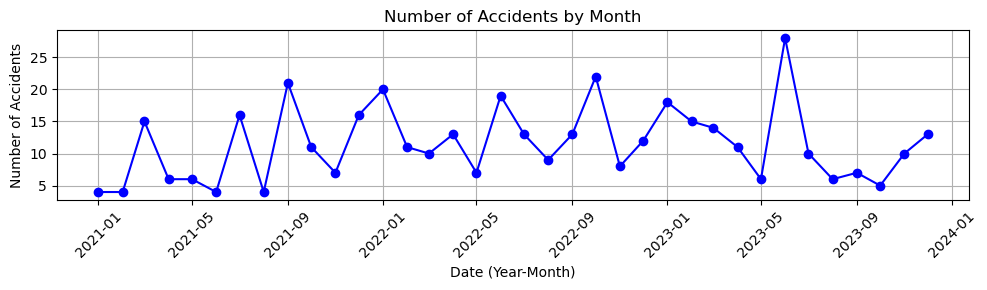

In [27]:
# plot the trend of car_crash_accidents
# Ensure the 'Date' column is in datetime format
f2_df['Date'] = pd.to_datetime(f2_df['Date'])

# Create a new column for the year-month format
f2_df['YearMonth'] = f2_df['Date'].dt.to_period('M')

# Group by the year-month column and count the number of accidents
monthly_counts = f2_df.groupby('YearMonth').size().reset_index(name='num_of_accident')

# Convert the 'YearMonth' column back to datetime for plotting
monthly_counts['YearMonth'] = monthly_counts['YearMonth'].dt.to_timestamp()

# Plotting the line graph
plt.figure(figsize=(10, 3))
plt.plot(monthly_counts['YearMonth'], monthly_counts['num_of_accident'], marker='o', linestyle='-', color='b')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add gridlines for better visualization
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [30]:
# see the data type for the column YearMonth
monthly_counts.dtypes

YearMonth          object
num_of_accident     int64
dtype: object

In [29]:
# chnage the data type from datetime to date
monthly_counts['YearMonth'] = monthly_counts['YearMonth'].dt.date

In [31]:
# this code has been added to show all the values in the dataframe instead of showing compressed table
pd.set_option('display.max_columns', None)  # None means show all columns

In [32]:
# Display the data as transposed table 
monthly_counts.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
YearMonth,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,2022-03-01,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01
num_of_accident,4,4,15,6,6,4,16,4,21,11,7,16,20,11,10,13,7,19,13,9,13,22,8,12,18,15,14,11,6,28,10,6,7,5,10,13


In [48]:
# grouped by Speed Limit and traffic control
f2_final_df = f2_df[
    (f2_df["Speed Limit"].isin([35, 40])) & 
    (f2_df["Traffic Control"] == "TRAFFIC SIGNAL")
]
f2_final_df

,Report Number,Route Type,Road Name,Cross-Street Name,Collision Type,Municipality,Weather,Surface Condition,Traffic Control,Speed Limit,Latitude,Longitude,Date,Time,Year,Month,Day,HourInterval,YearMonth,Hour Interval
62,DD56700006,Maryland (State),ROCKVILLE PIKE,W EDMONSTON DR,STRAIGHT MOVEMENT ANGLE,ROCKVILLE,NaN,DRY,TRAFFIC SIGNAL,40,39.074431,-77.135645,2023-07-22,1900-01-01 04:07:00,2023,7,22,04:00:00 - 04:59:59,2023-07,04:00:00 - 04:59:59
318,DD561500FH,Maryland (State),ROCKVILLE PIKE,RICHARD MONTGOMERY DR,STRAIGHT MOVEMENT ANGLE,ROCKVILLE,CLEAR,DRY,TRAFFIC SIGNAL,35,39.083840,-77.153118,2023-07-25,1900-01-01 15:20:00,2023,7,25,15:00:00 - 15:59:59,2023-07,15:00:00 - 15:59:59
1192,DD561500FM,Maryland (State),ROCKVILLE PIKE,ROLLINS AVE,STRAIGHT MOVEMENT ANGLE,ROCKVILLE,CLEAR,DRY,TRAFFIC SIGNAL,40,39.075409,-77.137646,2023-08-13,1900-01-01 12:55:00,2023,8,13,12:00:00 - 12:59:59,2023-08,12:00:00 - 12:59:59
1289,MCP2108001L,Maryland (State),ROCKVILLE PIKE,TWINBROOK PKWY,HEAD ON LEFT TURN,ROCKVILLE,RAINING,WET,TRAFFIC SIGNAL,35,39.059255,-77.121447,2023-08-06,1900-01-01 22:19:00,2023,8,6,22:00:00 - 22:59:59,2023-08,22:00:00 - 22:59:59
1301,DD561500FM,Maryland (State),ROCKVILLE PIKE,ROLLINS AVE,STRAIGHT MOVEMENT ANGLE,ROCKVILLE,CLEAR,DRY,TRAFFIC SIGNAL,40,39.075409,-77.137646,2023-08-13,1900-01-01 12:55:00,2023,8,13,12:00:00 - 12:59:59,2023-08,12:00:00 - 12:59:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166864,MCP1433003T,Maryland (State),ROCKVILLE PIKE,TWINBROOK PKWY,HEAD ON LEFT TURN,ROCKVILLE,CLEAR,DRY,TRAFFIC SIGNAL,35,39.058777,-77.121243,2022-01-07,1900-01-01 19:40:00,2022,1,7,19:00:00 - 19:59:59,2022-01,19:00:00 - 19:59:59
167802,MCP2394004K,Maryland (State),ROCKVILLE PIKE,HALPINE RD,SAME DIR REAR END,ROCKVILLE,CLEAR,DRY,TRAFFIC SIGNAL,35,39.061764,-77.123944,2021-07-13,1900-01-01 09:44:00,2021,7,13,09:00:00 - 09:59:59,2021-07,09:00:00 - 09:59:59
169524,MCP93860092,Maryland (State),ROCKVILLE PIKE,W EDMONSTON DR,STRAIGHT MOVEMENT ANGLE,ROCKVILLE,CLEAR,DRY,TRAFFIC SIGNAL,40,39.074707,-77.135586,2022-06-06,1900-01-01 12:30:00,2022,6,6,12:00:00 - 12:59:59,2022-06,12:00:00 - 12:59:59
170973,MCP2339007K,Maryland (State),ROCKVILLE PIKE,ROLLINS AVE,SAME DIRECTION RIGHT TURN,ROCKVILLE,CLEAR,DRY,TRAFFIC SIGNAL,35,39.058654,-77.121170,2022-10-07,1900-01-01 16:15:00,2022,10,7,16:00:00 - 16:59:59,2022-10,16:00:00 - 16:59:59


In [51]:
map_plot_2 = f2_final_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    color = 'r',
    width=1000,
    height=800
)
map_plot_2

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]